### DBScan Visual

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

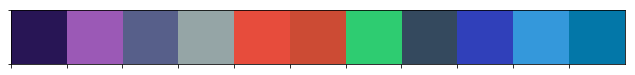

In [2]:
# Setting color scheme. 
alfs_colors = ['#281555', "#9b59b6", '#575f8a', '#95a5a6', "#e74c3c", '#CC4B34', "#2ecc71", "#34495e", '#3040ba', "#3498db", '#0377A8']

sns.set_palette(sns.color_palette(alfs_colors))
sns.palplot(sns.color_palette(alfs_colors))

In [4]:
NASA_Emissions_ClusterDetail = pd.read_csv('../data/nasa_emissions_doycombined_May28.csv')

In [23]:
print(NASA_Emissions_ClusterDetail.shape)
NASA_Emissions_ClusterDetail.head(20)

(727866, 8)


,Unnamed: 0,year,cluster_reference,cluster_doy,doy_count,centerpoint_doy,longitude,latitude
0,0,2003,2003_0,95,2,131.0,-80.686,25.4148
1,1,2003,2003_0,97,7,131.0,-80.686,25.4148
2,318540,2003,2003_0,98,6,131.0,-80.686,25.4148
3,2,2003,2003_0,98,5,131.0,-80.686,25.4148
4,3,2003,2003_0,99,1,131.0,-80.686,25.4148
5,318541,2003,2003_0,100,2,131.0,-80.686,25.4148
6,4,2003,2003_0,100,17,131.0,-80.686,25.4148
7,5,2003,2003_0,101,3,131.0,-80.686,25.4148
8,6,2003,2003_0,102,3,131.0,-80.686,25.4148
9,7,2003,2003_0,105,8,131.0,-80.686,25.4148


In [7]:
c_max = NASA_Emissions_ClusterDetail.groupby(["year", "cluster_reference"], as_index=False)["cluster_doy"].max()
c_min = NASA_Emissions_ClusterDetail.groupby(["year", "cluster_reference"], as_index=False)["cluster_doy"].min()
c_median = NASA_Emissions_ClusterDetail.groupby(["year", "cluster_reference"], as_index=False)["cluster_doy"].mean()
c_doy = NASA_Emissions_ClusterDetail.groupby(["year", "cluster_reference"], as_index=False)["cluster_doy"].count()

In [24]:
c_doy_sum = NASA_Emissions_ClusterDetail.groupby(["year", "cluster_reference"], as_index=False)["doy_count"].sum()

In [18]:
c_doy = c_doy.rename(columns = {'total_doy_count':'doycount_cluster'})

In [19]:
c_doy.head()

,year,cluster_reference,doycount_cluster
0,2003,2003_0,18
1,2003,2003_1,19
2,2003,2003_10,9
3,2003,2003_100,64
4,2003,2003_1000,1


In [20]:
c_doy['doy_max'] = c_max['cluster_doy']

In [21]:
c_doy['doy_min'] = c_min['cluster_doy']

In [25]:
c_doy['clusterpoint_sum'] = c_doy_sum['doy_count']

In [29]:
print(c_doy.shape)
c_doy.head(20)

(109163, 6)


,year,cluster_reference,doycount_cluster,doy_max,doy_min,clusterpoint_sum
0,2003,2003_0,18,139,95,202
1,2003,2003_1,19,228,197,38
2,2003,2003_10,9,358,328,39
3,2003,2003_100,64,362,248,10342
4,2003,2003_1000,1,107,107,5
5,2003,2003_1001,12,311,282,32
6,2003,2003_1002,8,161,116,14
7,2003,2003_1003,9,365,341,16
8,2003,2003_1004,2,104,91,4
9,2003,2003_1005,5,108,83,5


In [28]:
cluster_visual = c_doy.merge(right=NASA_Emissions_ClusterDetail.loc[:,['year','cluster_reference', 'longitude', 'latitude']],
                   how='left',
                   left_on=['year','cluster_reference'],
                   right_on=['year','cluster_reference'])

In [32]:
print(cluster_visual.shape)
cluster_visual.head(20)

(109163, 8)


,year,cluster_reference,doycount_cluster,doy_max,doy_min,clusterpoint_sum,longitude,latitude
0,2003,2003_0,18,139,95,202,-80.6860,25.4148
18,2003,2003_1,19,228,197,38,-80.9300,25.4582
37,2003,2003_10,9,358,328,39,-94.1279,29.7238
46,2003,2003_100,64,362,248,10342,-117.3717,34.2190
110,2003,2003_1000,1,107,107,5,-91.7724,30.5503
111,2003,2003_1001,12,311,282,32,-91.5838,30.5586
123,2003,2003_1002,8,161,116,14,-91.8531,30.5578
131,2003,2003_1003,9,365,341,16,-91.4775,30.5430
140,2003,2003_1004,2,104,91,4,-91.7867,30.5778
142,2003,2003_1005,5,108,83,5,-91.8645,30.5898


In [31]:
cluster_visual = cluster_visual.drop_duplicates(subset=['year', 'cluster_reference'], keep='first')